In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold(df, column_name, threshold):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [3]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# Coronaviridae S Protein UniRef90 - EMBL mapping Dataset Generation


### coronaviridae_s_uniref90_embl_hosts_pruned_metadata_w_seq.csv.

In [4]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/coronaviridae/20240313/coronaviridae_s_uniref90_embl_hosts_pruned_metadata_w_seq.csv")

In [5]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [6]:
df.shape

(860, 11)

In [7]:
sum(df.duplicated())

0

In [8]:
column_stats(df, "virus_name")

Number of unique values = 114
                                            virus_name  virus_name_count  virus_name_percent
0                          Infectious bronchitis virus               276           32.093023
1      Severe acute respiratory syndrome coronavirus 2                93           10.813953
2                                   Feline coronavirus                70            8.139535
3                                    Avian coronavirus                64            7.441860
4                               Human coronavirus OC43                55            6.395349
5                      Porcine epidemic diarrhea virus                47            5.465116
6                                        Coronaviridae                22            2.558140
7                                   Canine coronavirus                20            2.325581
8                                   Orthocoronavirinae                16            1.860465
9                                   Alph

,virus_name,virus_name_count,virus_name_percent
0,Infectious bronchitis virus,276,32.093023
1,Severe acute respiratory syndrome coronavirus 2,93,10.813953
2,Feline coronavirus,70,8.139535
3,Avian coronavirus,64,7.441860
4,Human coronavirus OC43,55,6.395349
5,Porcine epidemic diarrhea virus,47,5.465116
6,Coronaviridae,22,2.558140
7,Canine coronavirus,20,2.325581
8,Orthocoronavirinae,16,1.860465
9,Alphacoronavirus 1,16,1.860465


In [9]:
column_stats(df, "virus_host_name")

Number of unique values = 159
                                virus_host_name  virus_host_name_count  virus_host_name_percent
0                                       chicken                    172                20.000000
1                                  Homo sapiens                    162                18.837209
2                                 Gallus gallus                     99                11.511628
3                                   Felis catus                     48                 5.581395
4                                       porcine                     18                 2.093023
5                        Canis lupus familiaris                     17                 1.976744
6                                           cat                     17                 1.976744
7                                           pig                     16                 1.860465
8                      Gallus gallus domesticus                     14                 1.627907
9         

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,chicken,172,20.000000
1,Homo sapiens,162,18.837209
2,Gallus gallus,99,11.511628
3,Felis catus,48,5.581395
4,porcine,18,2.093023
5,Canis lupus familiaris,17,1.976744
6,cat,17,1.976744
7,pig,16,1.860465
8,Gallus gallus domesticus,14,1.627907
9,broiler chicken,12,1.395349


min seq len = 18
max seq len = 1582


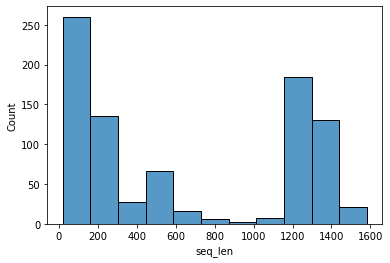

          start          end  count  percentage
0     18.000000   148.333333    244   28.372093
1    148.333333   278.666667    144   16.744186
2    278.666667   409.000000     35    4.069767
3    409.000000   539.333333     34    3.953488
4    539.333333   669.666667     48    5.581395
5    669.666667   800.000000      4    0.465116
6    800.000000   930.333333      5    0.581395
7    930.333333  1060.666667      2    0.232558
8   1060.666667  1191.000000     52    6.046512
9   1191.000000  1321.333333    141   16.395349
10  1321.333333  1451.666667    131   15.232558
11  1451.666667  1582.000000     20    2.325581


In [10]:
print_seq_len_histogram(df, 12)

**Sequence Length Parameters**

In [73]:
np.percentile(non_idv_df["seq_len"].values, [90, 95, 99])

array([ 623.9 , 1035.35, 3011.  ])

**Number of host classes**

In [87]:
# 1% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 1)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [88]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
filtered_df.to_csv(output_file_path, index=False)

In [89]:
# 0.7% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 0.7)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [90]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [91]:
# 0.5% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 0.5)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [92]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)